# Clustering & PCA Assignment

## Problem Statement:
    
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## Objectives

- Perform PCA on the dataset and obtain the new dataset with the Principal Components. Choose the appropriate number of components k. You need to perform your clustering activity on this new dataset, i.e. the PCA modified dataset with the k components.

- Outlier Analysis: You must perform the Outlier Analysis on the dataset, before or after performing PCA, as per your choice. However, you do have the flexibility of not removing the outliers if it suits the business needs or a lot of countries are getting removed. Hence, all you need to do is find the outliers in the dataset, and then choose whether to keep them or remove them depending on the results you get.

- Try both K-means and Hierarchical clustering(both single and complete linkage) on this dataset to create the clusters. [Note that both the methods may not produce identical results and you might have to choose one of them for the final list of countries.]
Analyse the clusters and identify the ones which are in dire need of aid. You can analyse the clusters by comparing how these three variables - [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries. Note that you perform clustering on the PCA modified dataset and the clusters that are formed are being analysed now using the original variables to identify the countries which you finally want to select.

- Also, you need to perform visualisations on the clusters that have been formed.  You can do this by choosing the first two Principal Components (on the X-Y axes) and plotting a scatter plot of all the countries and differentiating the clusters. You should also do the same visualisation using any two of the original variables (like gdpp, child_mort, etc.) on the X-Y axes as well. You can also choose other types of plots like boxplots, etc. 

- The final list of countries depends on the number of components that you choose and the number of clusters that you finally form. Also, both K-means and Hierarchical may give different results. Hence, there might be some subjectivity in the final number of countries that you think should be reported back to the CEO. Here, make sure that you report back at least 5 countries which are in direst need of aid from the analysis work that you perform.

In [1]:
# Importing Important Libraries for EDA, Data Cleaning, PreProcessing, PCA & Clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Importing the dataset as pandas dataframe. We will observe first 5 rows of the dataframe to get a glimpse of dataset.
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape # Shape of dataframe ie no. of rows and columns. We can see that there are 167 rows and 10 columns in the dataframe.

(167, 10)

In [4]:
df.info() # This will show the no. of rows and the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
df.describe() # Some common statistics of the dataframe.

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Referring to the data-dictionary provided, we can observe that the `exports`, `imports` and `health` columns are basically given as %age of total GDP. We will first convert them to absolute terms for clear representation of data.

In [6]:
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [7]:
# Again going through the dataframe after the transformation to see if there are changes in dataset. 
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [8]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


This shows that there are total 167 rows in every column with huge variations in mean/median and maximum value. The data is not increasing gradually from 25th percentile to 75th and max value, indicating the possibility of outliers.

### Null Value/NAN Value Treatment

In [9]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

This clearly shows that there is no null value in the dataset.

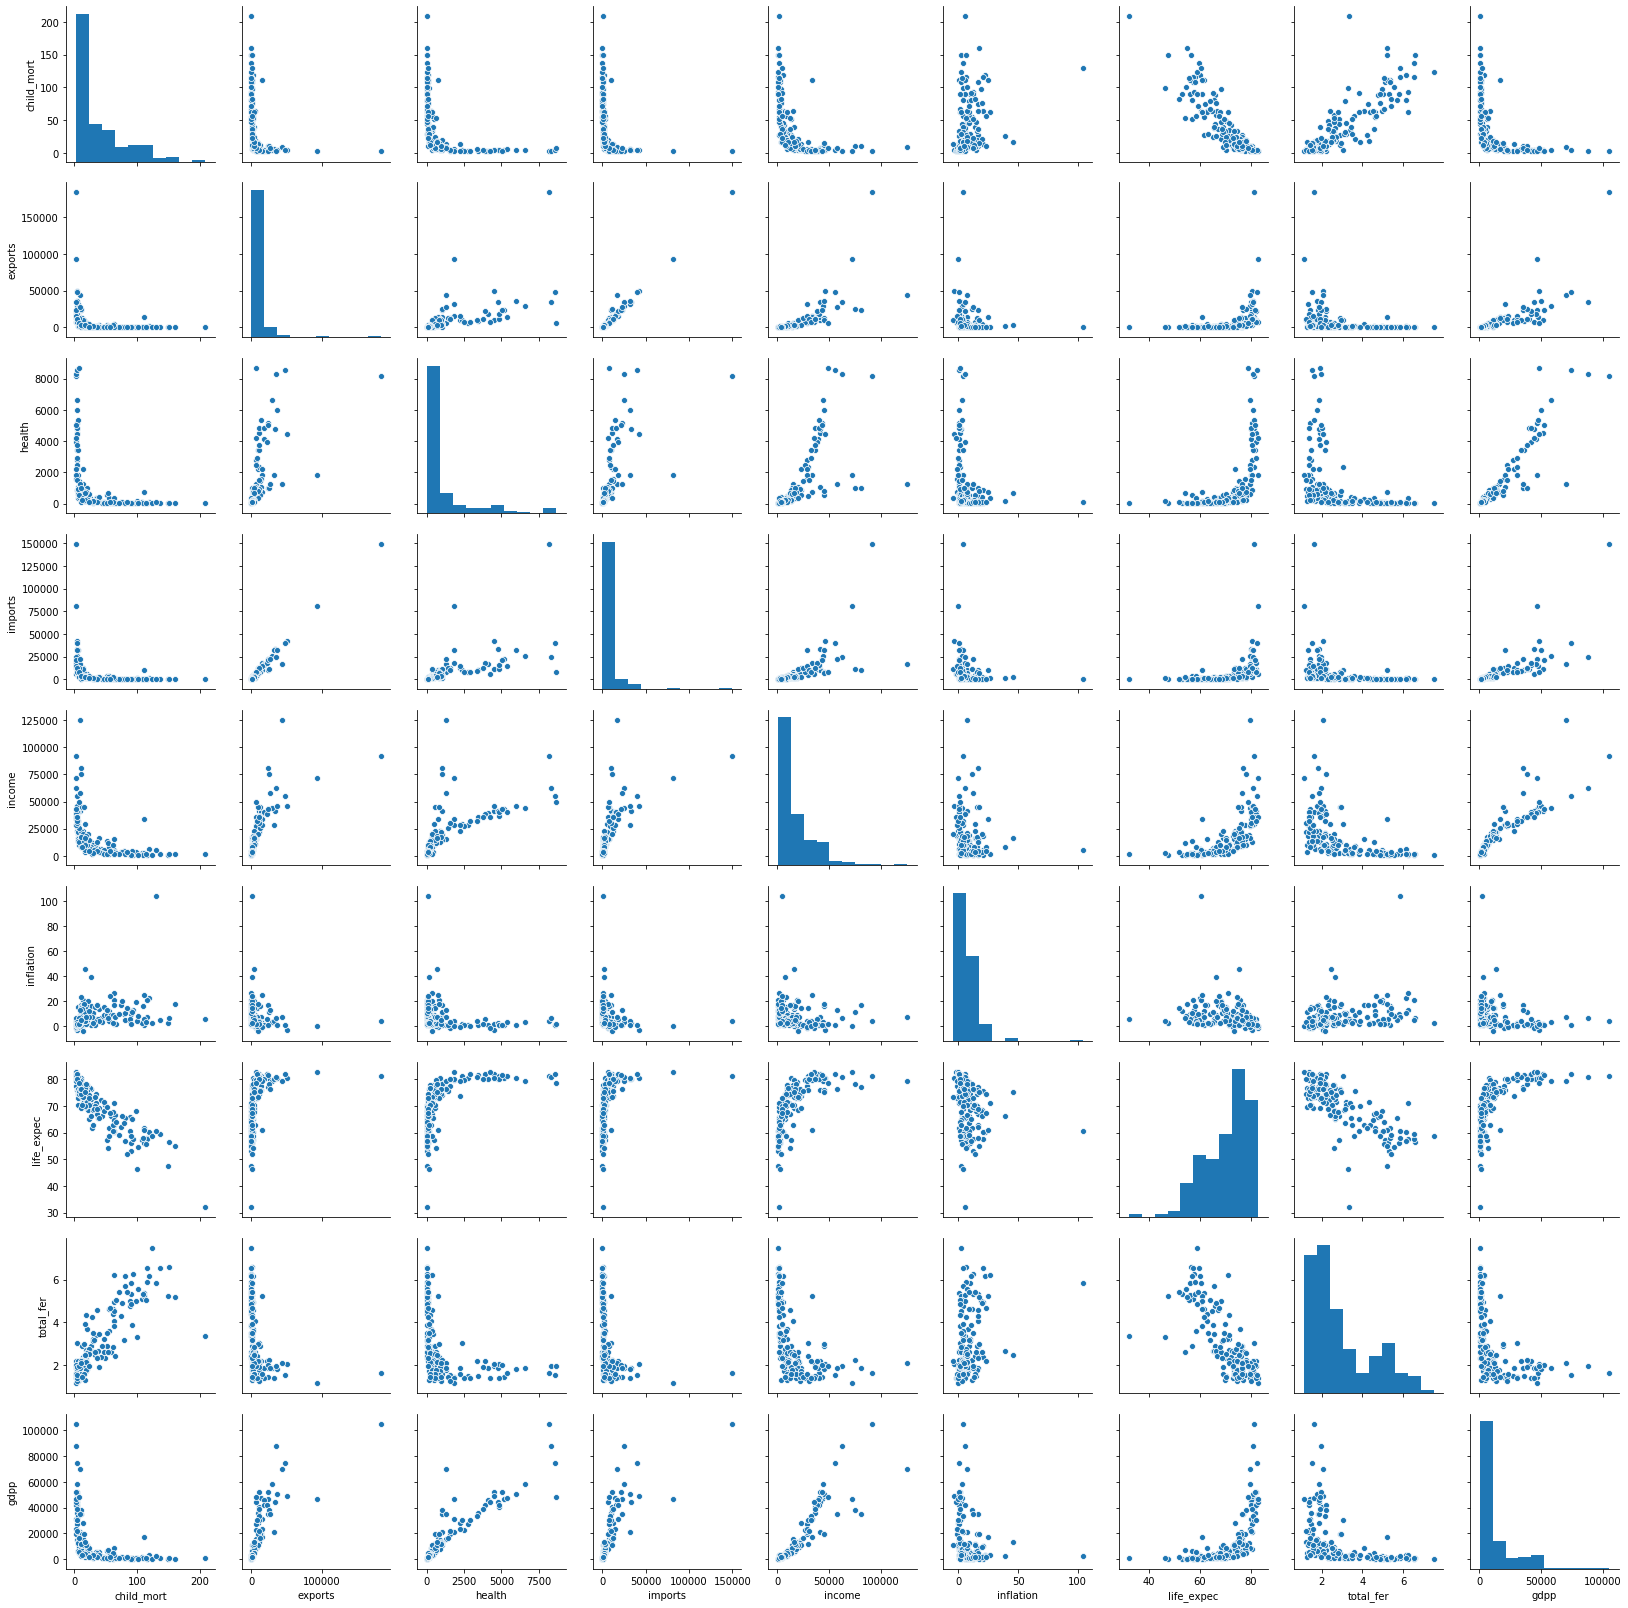

In [11]:
sns.pairplot(df) # Showing pairwise relationship with the variables. Main interpretation of the variables are as follows:

1. High Child Mortality rate prevails in countries with very low gdpp, low income and low health, it has negative correlation with life expectency, positive correlation with total fertility, and not related with the inflation.

2. Export, health, Imports, Income are highly positive correlated with GDPP as usual.

3. There is a huge gap in exports,imports, health in developed vs under-developed countries.

4. Life expectancy is high in most of the countries as per the histogram.

### Rescaling & Outlier Treatment

In [12]:
num_df = df.drop('country', axis=1) # Dropping the non-numeric column from the dataframe.

In [13]:
num_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#### 1. Rescaling of Dataset

We will apply standard scaler to normalise the features to arrive at a common scale without distorting differences in the ranges of values.

In [14]:
scaler = StandardScaler()
scaled = scaler.fit_transform(num_df)

In [15]:
scaled_num_df = pd.DataFrame(scaled)
scaled_num_df.columns = num_df.columns
scaled_num_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [16]:
round(scaled_num_df.describe(percentiles=[.25,.5,.75,.90,.95,.99]),2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.89,-0.41,-0.58,-0.45,-0.86,-1.14,-4.34,-1.19,-0.70
25%,-0.75,-0.39,-0.54,-0.41,-0.72,-0.57,-0.59,-0.76,-0.64
50%,-0.47,-0.31,-0.41,-0.31,-0.37,-0.23,0.29,-0.36,-0.45
75%,0.59,-0.01,-0.04,0.08,0.29,0.28,0.70,0.62,0.06
90%,1.54,0.58,1.54,0.58,1.25,0.84,1.11,1.57,1.58
95%,1.93,1.34,2.18,1.20,1.62,1.24,1.22,1.93,1.95
99%,2.86,3.20,4.09,3.33,3.50,3.20,1.33,2.40,3.62


From the above statistics we can easily observe that there is huge difference in 99th percentile and max value even after scaling the dataset. It clearly indicates the presence of outliers.

#### Outlier Analysis

Let's visualise the outliers present in the dataset using boxplot.

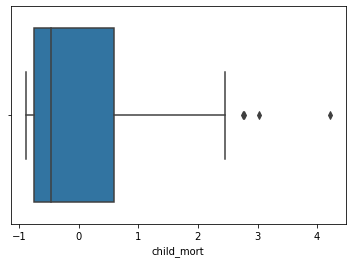

In [17]:
sns.boxplot(scaled_num_df["child_mort"]) 

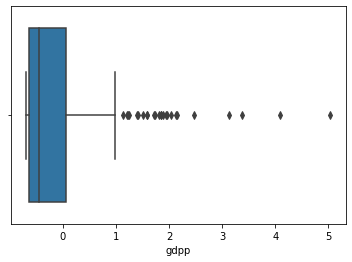

In [18]:
sns.boxplot(scaled_num_df["gdpp"])

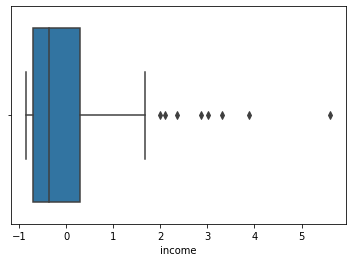

In [19]:
sns.boxplot(scaled_num_df["income"])

In [20]:
## Calulating Interquartile Range
Q1 = scaled_num_df.quantile(0.05)
Q3 = scaled_num_df.quantile(0.95)
IQR = Q3 - Q1
print(IQR)

child_mort    2.798945
exports       1.747469
health        2.750537
imports       1.641288
income        2.449342
inflation     1.962860
life_expec    2.889526
total_fer     2.962284
gdpp          2.634605
dtype: float64


In [21]:
### Removing the outlier from the dataset and creating a new dataframe.
scaled_num_df1 = scaled_num_df[~((scaled_num_df < (Q1 - 1.5 * IQR)) |(scaled_num_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [22]:
scaled_num_df1.shape # We can observer that the new dataframe has 163 rows ie 4 fewer rows as compared to original dataframe. Since, the outlier treatment
# removes only 4 rows we will continue with new dataframe for further analysis.

(163, 9)

In [23]:
scaled_num_df1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,0.001294,-0.099849,-0.024483,-0.092429,-0.071937,-0.048564,-0.015068,0.004479,-0.057870
std,0.992903,0.505364,0.964769,0.525515,0.827967,0.713842,0.997883,0.996305,0.887208
min,-0.887138,-0.414037,-0.581240,-0.449160,-0.860326,-1.137852,-4.337186,-1.138246,-0.696801
25%,-0.737914,-0.389609,-0.547935,-0.405554,-0.718757,-0.566641,-0.592758,-0.747338,-0.637754
50%,-0.461850,-0.315157,-0.417862,-0.313201,-0.374849,-0.226950,0.286958,-0.356431,-0.457167
75%,0.592667,-0.051513,-0.077869,0.015300,0.255216,0.281636,0.692980,0.617525,0.018379
max,4.221297,2.385067,4.235432,2.422982,3.301480,3.616865,1.380962,3.009349,4.095266


### PCA Analysis

In [24]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [25]:
pca.fit(scaled_num_df1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [26]:
pca.components_ # Showing the components of PCA analysis

array([[-0.40547054,  0.19027945,  0.38143654,  0.20345118,  0.34859443,
        -0.12164056,  0.42932563, -0.38605726,  0.3779232 ],
       [ 0.45418913,  0.21457416,  0.45948032,  0.20372993,  0.22351284,
        -0.0212336 , -0.2997844 ,  0.44867933,  0.39172621],
       [-0.08437923,  0.05375916, -0.08856547, -0.02210629,  0.24237458,
         0.94460346,  0.11809247,  0.11862097,  0.0511827 ],
       [ 0.19483835,  0.1241783 , -0.12507801,  0.08668452,  0.23873723,
         0.10219027, -0.60619291, -0.69883293,  0.01354384],
       [ 0.00240793, -0.35460508,  0.63711228, -0.26601278, -0.50521918,
         0.24364272, -0.10709574, -0.25168573,  0.09028391],
       [-0.24052152,  0.46397873,  0.03529927,  0.60913803, -0.54932044,
         0.13099074, -0.12720073,  0.02379525, -0.13755069],
       [ 0.72542614,  0.10657134, -0.0464539 ,  0.15588945, -0.16659042,
         0.07019301,  0.56238178, -0.28695669, -0.06814057],
       [ 0.00882968,  0.02530037,  0.45343516,  0.0869769 ,  0

In [27]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([6.51026343e-01, 1.79042206e-01, 7.55036934e-02, 3.63306921e-02,
       2.67277611e-02, 1.59290467e-02, 1.28884728e-02, 2.08109801e-03,
       4.70687076e-04])

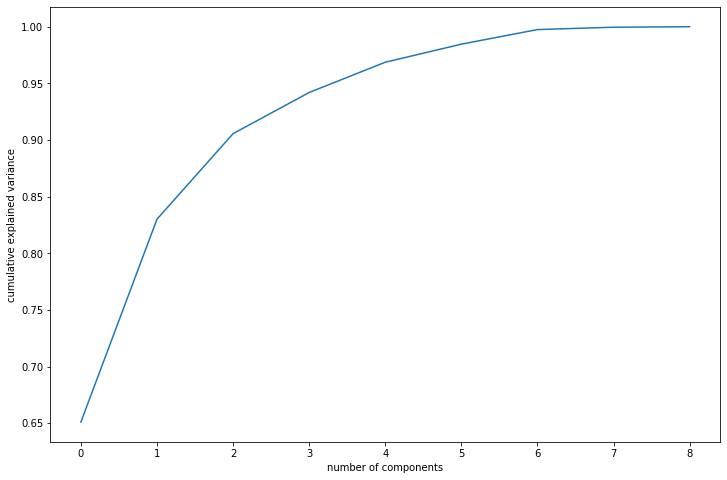

In [28]:
#Plotting the scree plot
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Around 96% of the information is being explained by 4 components.

In [29]:
## Created dataframe with 4 PCA variables.
colnames = list(scaled_num_df1.columns)
pcs_scaled_num_df1 = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3]})
pcs_scaled_num_df1

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.405471,0.454189,-0.084379,0.194838
1,exports,0.190279,0.214574,0.053759,0.124178
2,health,0.381437,0.459480,-0.088565,-0.125078
3,imports,0.203451,0.203730,-0.022106,0.086685
4,income,0.348594,0.223513,0.242375,0.238737
5,inflation,-0.121641,-0.021234,0.944603,0.102190
6,life_expec,0.429326,-0.299784,0.118092,-0.606193
7,total_fer,-0.386057,0.448679,0.118621,-0.698833
8,gdpp,0.377923,0.391726,0.051183,0.013544


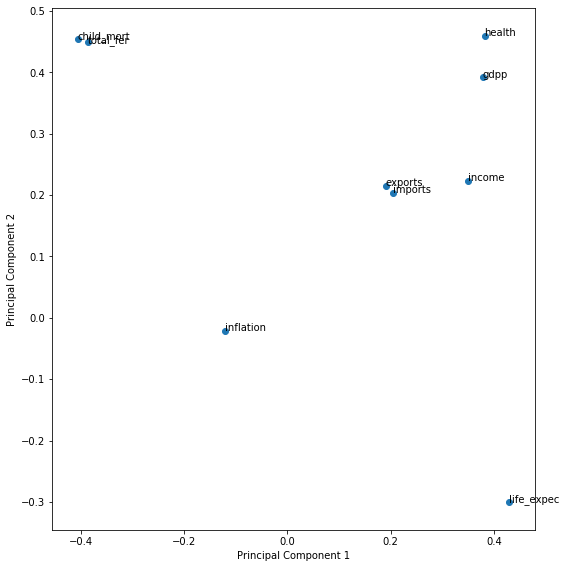

In [30]:
# Let's plot them to visualise how these features are loaded
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_scaled_num_df1.PC1, pcs_scaled_num_df1.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_scaled_num_df1.Feature):
    plt.annotate(txt, (pcs_scaled_num_df1.PC1[i],pcs_scaled_num_df1.PC2[i]))
plt.tight_layout()
plt.show()

We see that the first component is in the direction where the `life_expec` variables are heavy and second component id in the direction where `child_mort` and `gdpp` variables are heavy.

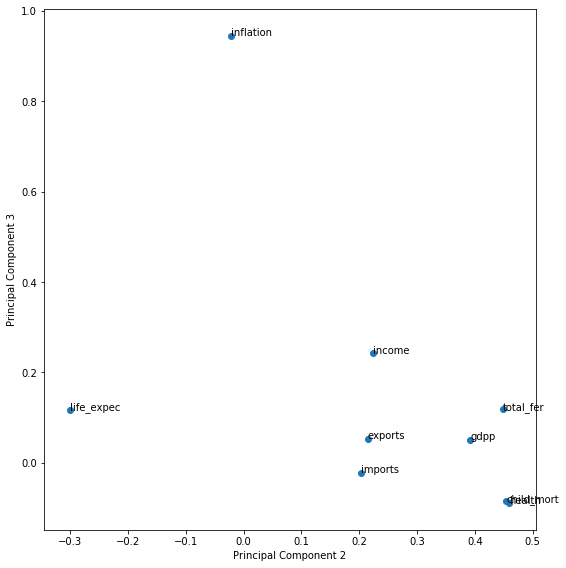

In [31]:
# Let's plot them to visualise how these features are loaded
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_scaled_num_df1.PC2, pcs_scaled_num_df1.PC3)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
for i, txt in enumerate(pcs_scaled_num_df1.Feature):
    plt.annotate(txt, (pcs_scaled_num_df1.PC2[i],pcs_scaled_num_df1.PC3[i]))
plt.tight_layout()
plt.show()

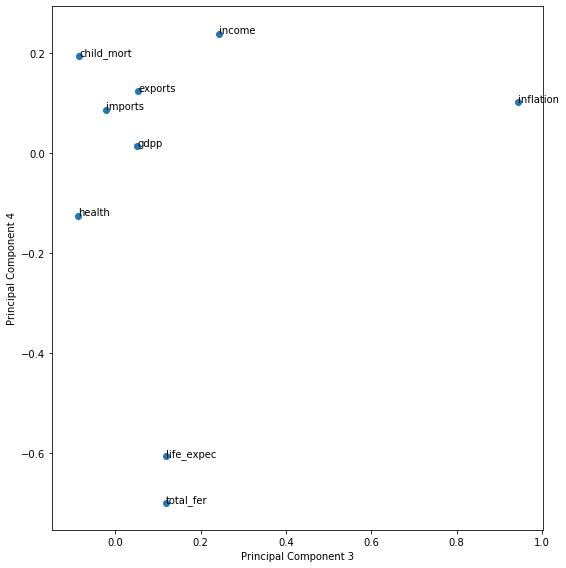

In [32]:
# Let's plot them to visualise how these features are loaded
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_scaled_num_df1.PC3, pcs_scaled_num_df1.PC4)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
for i, txt in enumerate(pcs_scaled_num_df1.Feature):
    plt.annotate(txt, (pcs_scaled_num_df1.PC3[i],pcs_scaled_num_df1.PC4[i]))
plt.tight_layout()
plt.show()

In [33]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [34]:
pca_scaled_num = pca_final.fit_transform(scaled_num_df1)

In [35]:
pca_scaled_num.shape

(163, 4)

In [36]:
pca_scaled_num[:5]

array([[-2.79566338,  1.12225764, -0.03908421,  0.2526587 ],
       [ 0.35115929, -1.35095854, -0.30053399,  0.0197979 ],
       [-0.15637475, -0.8715941 ,  0.86985112,  0.37464535],
       [-2.94195679,  1.56235456,  1.19625178,  0.32670942],
       [ 0.90376331, -0.76390318, -0.37291144,  0.1138339 ]])

In [37]:
corrmat = np.corrcoef(pca_scaled_num.transpose()) # Let's see correlation matrix

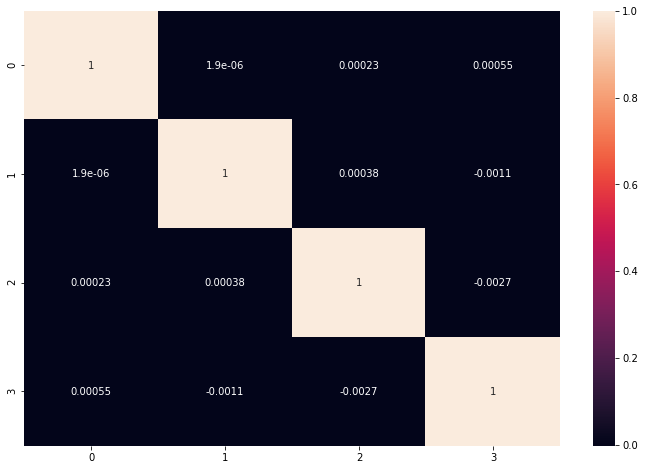

In [38]:
plt.figure(figsize = (12,8))
sns.heatmap(corrmat,annot = True)

In [39]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min())
# we see that correlations are indeed very close to 0

max corr: 0.0005483985832439112 , min corr:  -0.00271988770046246


## Clustering

### 1. K-Mean Clustering

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [41]:
# Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [42]:
#First convert the numpy array that we have to a dataframe
pca_scaled_num_df = pd.DataFrame(pca_scaled_num)
pca_scaled_num_df.columns = ['PC1','PC2','PC3','PC4']
pca_scaled_num_df.head()

,PC1,PC2,PC3,PC4
0,-2.795663,1.122258,-0.039084,0.252659
1,0.351159,-1.350959,-0.300534,0.019798
2,-0.156375,-0.871594,0.869851,0.374645
3,-2.941957,1.562355,1.196252,0.326709
4,0.903763,-0.763903,-0.372911,0.113834


In [43]:
hopkins(pca_scaled_num_df)

0.8436430419130199

A value greater than 0.5 confirms that the dataset is suitable for clustering.

#### Finding the optimal numbers of clusters

##### 1. Elbow Curve/SSD (sum of squared distance) method

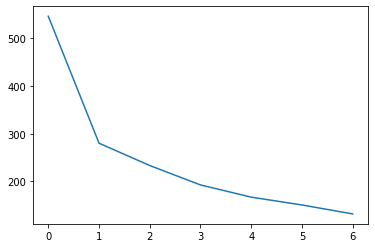

In [45]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=num_cluster, max_iter=50)
    kmeans.fit(pca_scaled_num_df)
    ssd.append(kmeans.inertia_)
# Plot the SSDs for each n_cluster
plt.plot(ssd)

#### 2. Silhouette Score

In [90]:
range_n_clusters = [2,3,4,5,6,7,8]
for num_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=num_cluster, max_iter=50)
    kmeans.fit(pca_scaled_num_df)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(pca_scaled_num_df, cluster_labels)
    
    print("For n_Cluster = {0}, the silhouette score is {1}".format(num_cluster, silhouette_avg))

For n_Cluster = 2, the silhouette score is 0.5017774588536934
For n_Cluster = 3, the silhouette score is 0.5638733473215646
For n_Cluster = 4, the silhouette score is 0.5054535245513277
For n_Cluster = 5, the silhouette score is 0.43374542777913483
For n_Cluster = 6, the silhouette score is 0.3157168829042766
For n_Cluster = 7, the silhouette score is 0.3418757194558599
For n_Cluster = 8, the silhouette score is 0.3500836483939067


From the above silhouette score, num_cluster = 3 will be suitable for this dataset.

In [46]:
# Final Model with K = 3
kmeans = KMeans(n_clusters = 3, max_iter = 50)
kmeans.fit(pca_scaled_num_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 1,
       0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [48]:
pca_scaled_num_df["clusterid"] = kmeans.labels_
pca_scaled_num_df.head()

,PC1,PC2,PC3,PC4,clusterid
0,-2.795663,1.122258,-0.039084,0.252659,0
1,0.351159,-1.350959,-0.300534,0.019798,2
2,-0.156375,-0.871594,0.869851,0.374645,2
3,-2.941957,1.562355,1.196252,0.326709,0
4,0.903763,-0.763903,-0.372911,0.113834,2


In [49]:
pca_scaled_num_df['clusterid'].value_counts()

2    87
0    47
1    29
Name: clusterid, dtype: int64

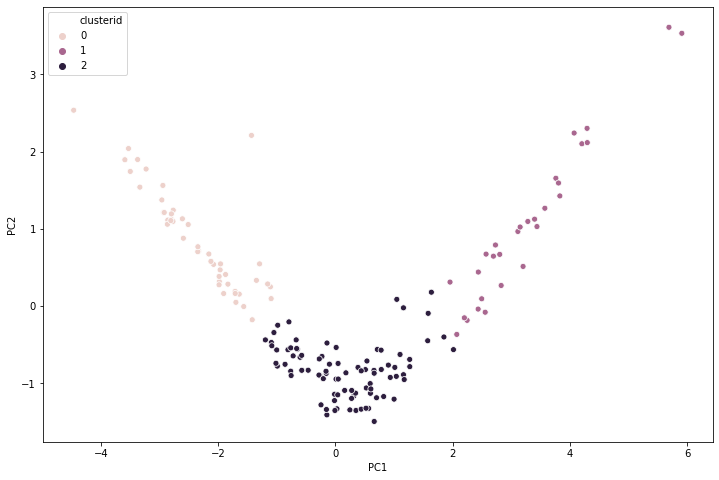

In [50]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
fig.tight_layout()
plt.figure(figsize=(12,8))
sns.scatterplot(x='PC1',y='PC2',hue='clusterid',data=pca_scaled_num_df)

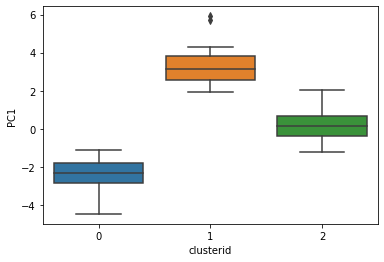

In [51]:
sns.boxplot(x="clusterid", y="PC1", data = pca_scaled_num_df)

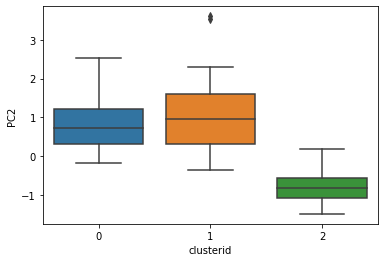

In [52]:
sns.boxplot(x="clusterid", y="PC2", data = pca_scaled_num_df)

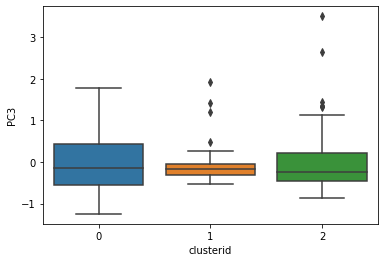

In [53]:
sns.boxplot(x="clusterid", y="PC3", data = pca_scaled_num_df)

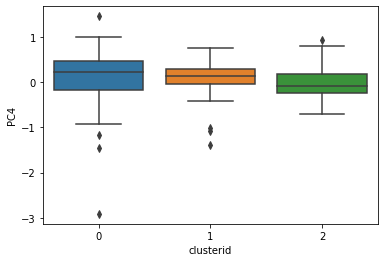

In [91]:
sns.boxplot(x="clusterid", y="PC4", data = pca_scaled_num_df)

PC1 & PC2 consists of datapoint with good variations in clusters 0,1, & 2. In PC3 & PC4 however the data in cluster 0,1, & 2 have similar median values but cluster 0 and 2 have different min, max and quartile values.

### Hierarchical Clustering

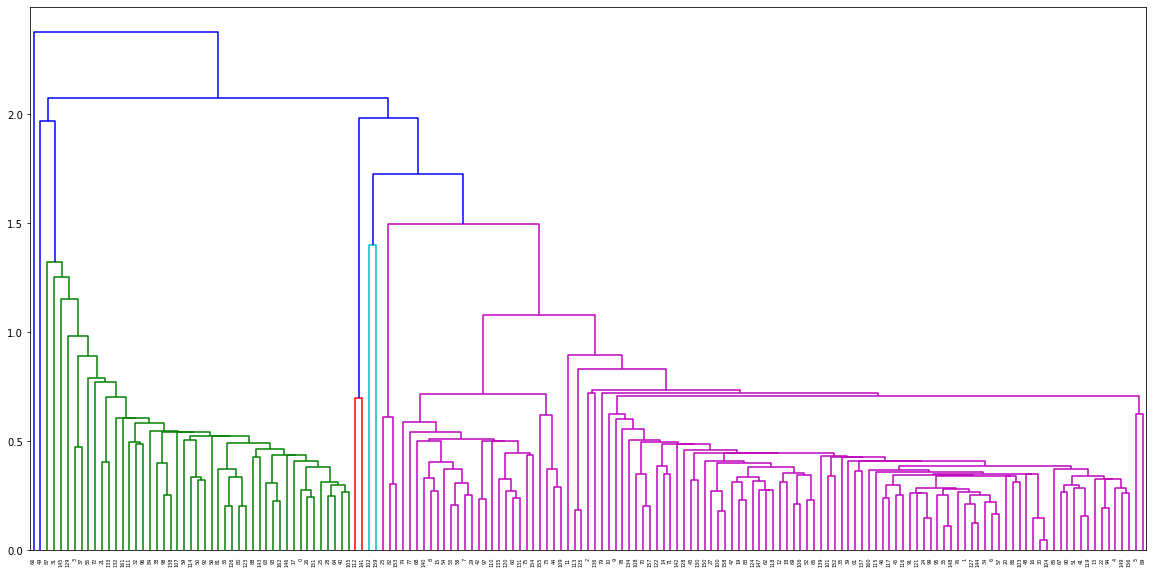

In [54]:
## Single Linkage
plt.figure(figsize=(20,10))
mergings = linkage(pca_scaled_num_df, method="single", metric="euclidean")
dendrogram(mergings)
plt.show()

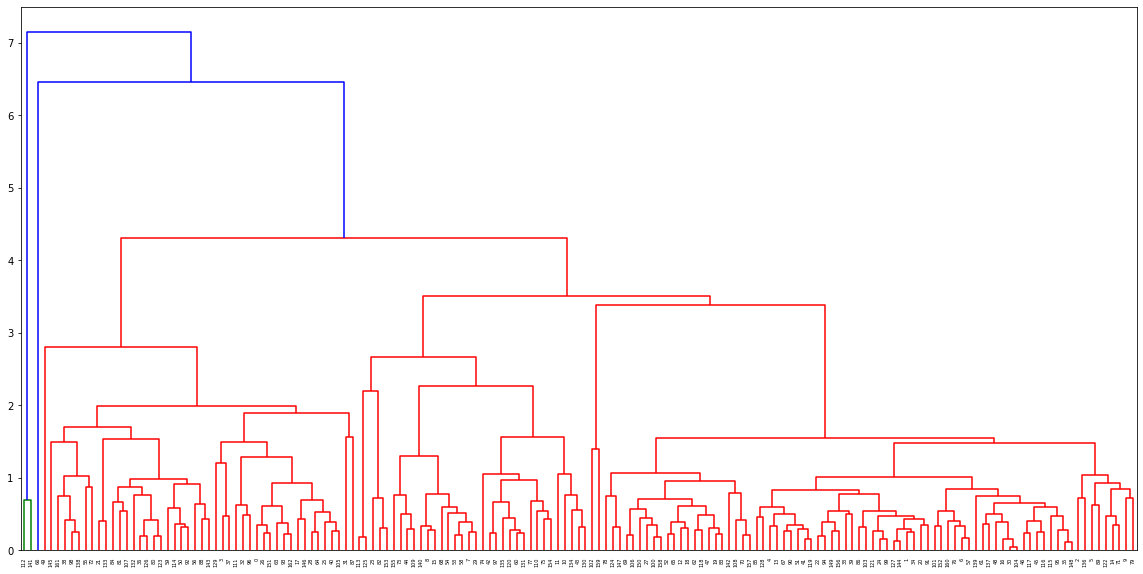

In [55]:
## Average Linkage
plt.figure(figsize=(20,10))
mergings_average = linkage(pca_scaled_num_df, method="average",metric="euclidean")
dendrogram(mergings_average)
plt.show()

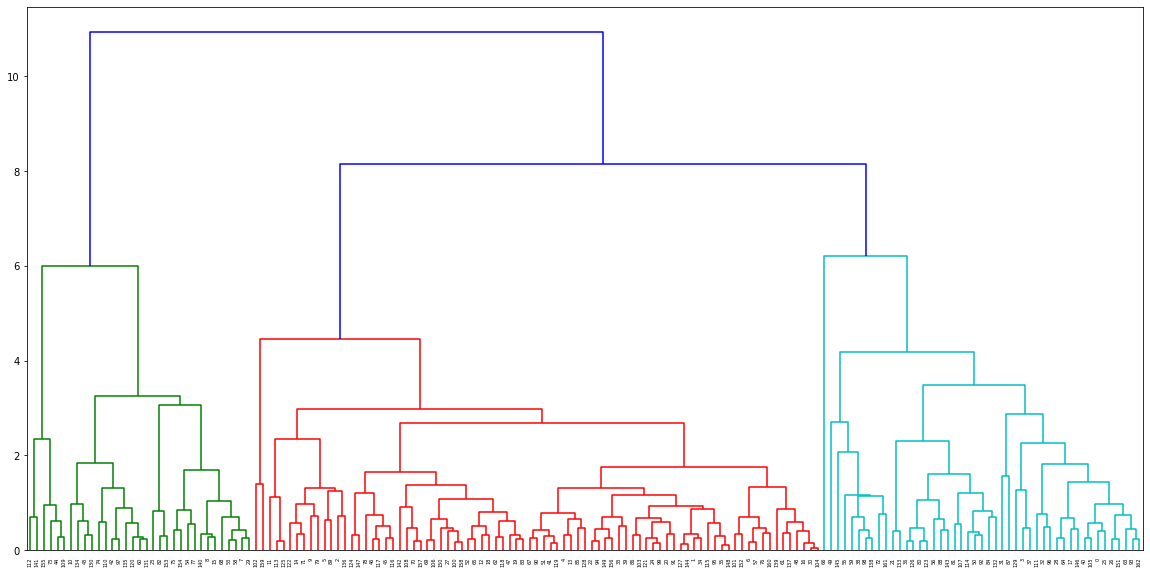

In [56]:
## Complete Linkage
plt.figure(figsize=(20,10))
mergings_complete = linkage(pca_scaled_num_df, method="complete", metric="euclidean")
dendrogram(mergings_complete)
plt.show()

The above dendrogram clearly divides the datapoints in 3 distinct clusters.

In [57]:
cluster_labels = cut_tree(mergings_complete,n_clusters=3).reshape(-1, ) #getting the cluster labels by cutting the dendrogram at no. of cluster=3

In [58]:
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2,
       2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 2,
       0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 0, 0])

In [59]:
# Lets create a viriable `cluster_label` to show the clusters created using hierarchical clustering(complete linkage)
pca_scaled_num_df["cluster_label"] = cluster_labels
pca_scaled_num_df.head()

,PC1,PC2,PC3,PC4,clusterid,cluster_label
0,-2.795663,1.122258,-0.039084,0.252659,0,0
1,0.351159,-1.350959,-0.300534,0.019798,2,1
2,-0.156375,-0.871594,0.869851,0.374645,2,1
3,-2.941957,1.562355,1.196252,0.326709,0,0
4,0.903763,-0.763903,-0.372911,0.113834,2,1


In [60]:
pca_scaled_num_df['cluster_label'].value_counts()

1    83
0    47
2    33
Name: cluster_label, dtype: int64

Above clustering separates the dataset in 3 clear clusters with good amount of datapoints. It also resembles the no. of datapoints in each cluster derived using K-Means clustering.

In [61]:
pca_scaled_num_df.shape

(163, 6)

In [62]:
# Merge the datset with the orginal dataframe.
df2 = pd.merge(df,pca_scaled_num_df,left_index=True,right_index=True,how='inner')

In [63]:
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,clusterid,cluster_label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.795663,1.122258,-0.039084,0.252659,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0.351159,-1.350959,-0.300534,0.019798,2,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.156375,-0.871594,0.869851,0.374645,2,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.941957,1.562355,1.196252,0.326709,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.903763,-0.763903,-0.372911,0.113834,2,1


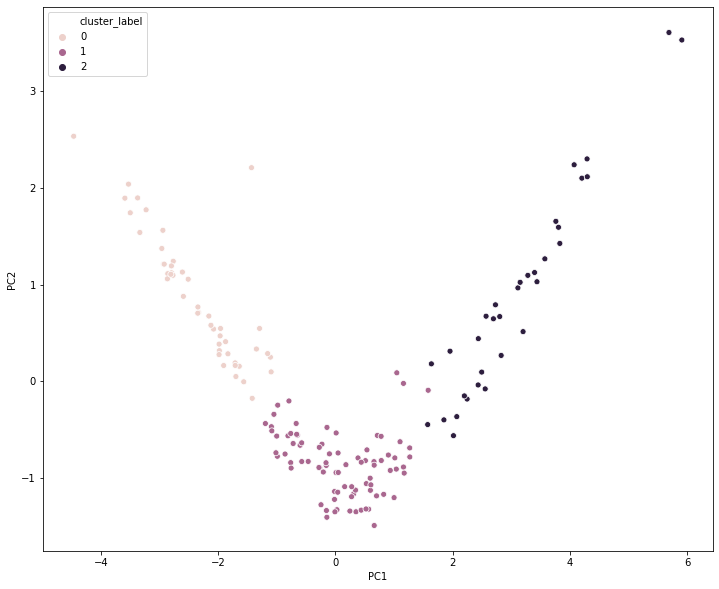

In [64]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='PC1',y='PC2',hue='cluster_label',legend='full',data=df2)

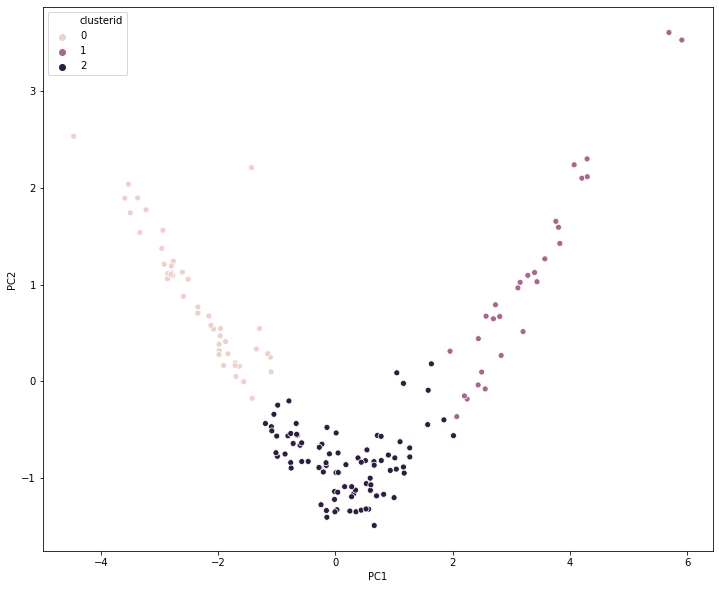

In [65]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='PC1',y='PC2',hue='clusterid',legend='full',data=df2)

In [66]:
df2 = df2.drop(['PC1','PC2','PC3','PC4'], axis=1) # Lets drop the PCA Variables now to get our original dataframe with clusters.

In [67]:
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterid,cluster_label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,1


### Countries in various clusters

In [68]:
cl1_count_kmean = df2[df2.clusterid == 0].country
cl1_count_kmean.head()

0      Afghanistan
3           Angola
17           Benin
21        Botswana
25    Burkina Faso
Name: country, dtype: object

In [69]:
cl2_count_kmean = df2[df2.clusterid == 1].country
cl2_count_kmean.head()

7     Australia
8       Austria
15      Belgium
23       Brunei
29       Canada
Name: country, dtype: object

In [70]:
cl3_count_kmean = df2[df2.clusterid == 2].country
cl3_count_kmean.head()

1                Albania
2                Algeria
4    Antigua and Barbuda
5              Argentina
6                Armenia
Name: country, dtype: object

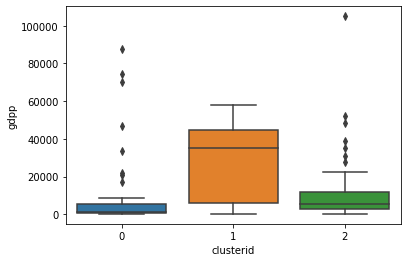

In [71]:
sns.boxplot(x="clusterid", y="gdpp", data = df2)

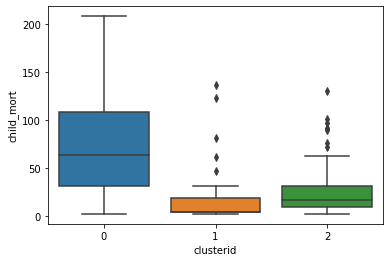

In [72]:
sns.boxplot(x="clusterid", y="child_mort", data = df2)

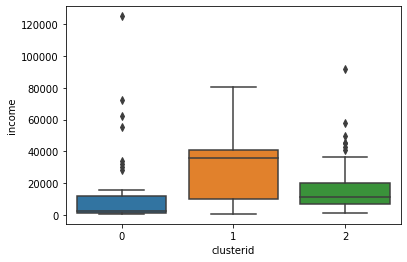

In [73]:
sns.boxplot(x="clusterid", y="income", data = df2)

Hence in all three parameters `gdpp`, `child_mort`, `income`, countries falling under cluster 1 with clusterid = 0 derived from K-Means clustering method are under the category of most under-developed countries and need more focus in terms of financial Aids. Name of these countries are as follows:

In [74]:
cl2_count_kmean.values

array(['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Mali', 'Nepal',
       'Netherlands', 'Niger', 'Philippines', 'Seychelles', 'Slovenia',
       'Sri Lanka', 'St. Vincent and the Grenadines', 'Turkey',
       'Turkmenistan', 'Uganda'], dtype=object)

##### Similarly we can use clusters defined by Hiererchical Clustering(complete linkage) to derive the under-developed countries.

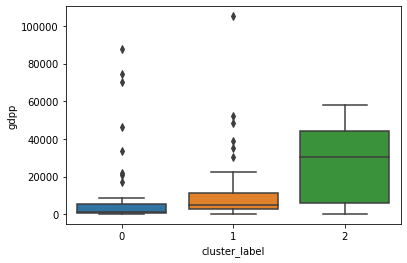

In [75]:
sns.boxplot(x="cluster_label", y="gdpp", data = df2)

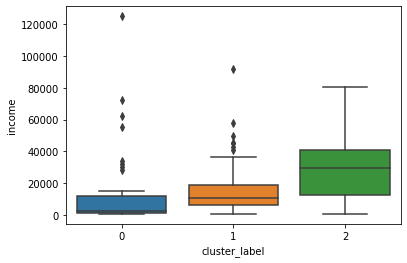

In [76]:
sns.boxplot(x="cluster_label", y="income", data = df2)

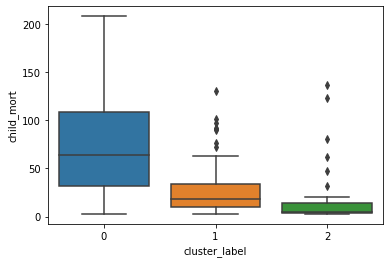

In [77]:
sns.boxplot(x="cluster_label", y="child_mort", data = df2)

Hence in all three parameters `gdpp`, `child_mort`, `income` countries falling under cluster 1 with cluster_label = 0 derived from Hiererchical Clustering(complete linkage) method are under the category of most under-developed countries and need more focus in terms of financial Aids. Name of these countries are as follows:

In [78]:
cl1_count_hie = df2[df2.cluster_label== 0].country
cl1_count_hie.values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Macedonia, FYR', 'Madagascar',
       'Maldives', 'Malta', 'Morocco', 'Myanmar', 'New Zealand', 'Norway',
       'Qatar', 'Rwanda', 'Senegal', 'Sierra Leone', 'Singapore',
       'South Korea', 'Suriname', 'Switzerland', 'Tajikistan', 'Tonga',
       'Uzbekistan', 'Vanuatu'], dtype=object)

We can easily observe that the countries falling under the under developed category through both the clustering methods are almost same. However, the clustering formed by K-Mean method shows more clear clusters as evident from the scatterplot. Hence, we will use the clusters formed by K-mean Clustering for further analysis.

### Analysis of Clusters

In [79]:
clu_childmort = pd.DataFrame(df2.groupby(["clusterid"]).child_mort.median())
clu_gdpp = pd.DataFrame(df2.groupby(["clusterid"]).gdpp.median())
clu_income = pd.DataFrame(df2.groupby(["clusterid"]).income.median())

In [80]:
df3 = pd.concat([pd.Series([0,1,2]),clu_childmort,clu_gdpp,clu_income], axis=1)
df3.columns = ['clusterid','child_mort','gdpp','income']
df3

,clusterid,child_mort,gdpp,income
0,0,63.9,1220,2690
1,1,4.6,35300,35800
2,2,17.4,5410,11200


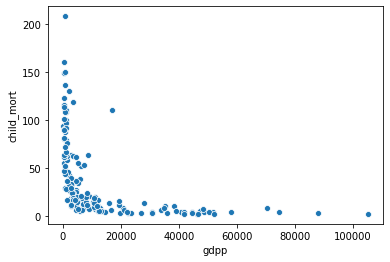

In [81]:
sns.scatterplot(x='gdpp',y='child_mort',data=df2)

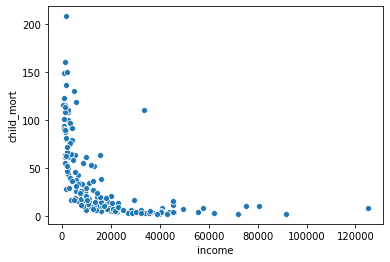

In [82]:
sns.scatterplot(x='income',y='child_mort',data=df2)

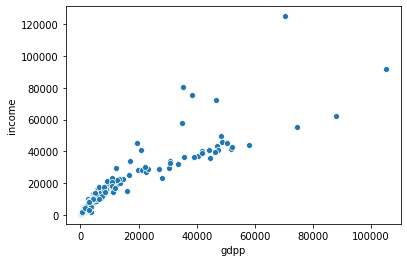

In [83]:
sns.scatterplot(x='gdpp',y='income',data=df2)

## Binning

In [86]:
fin=df2[df2['child_mort']>= 63.9]
fin=fin[fin['income']<= 1220]
fin1=fin[fin['gdpp']<= 2690]
fin1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterid,cluster_label
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0,0
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0,0


Based on Binning as well as clustering it is clear that countries mentioned above with clusterid/cluster_label = 0 are among the most under-developed countries and need immediate attention in priority in terms of financial Aids.